### Importaciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, Function, dsolve, exp, sin, pi

### Definicion de la funcion

Nuestra funcion por defecto es $f(t,x) = x$  
( Más adelante veremos que podemos cambiar la función si se requiere)

In [2]:
def funcion_f(ecuacion:str="x"):
    function = sp.sympify(ecuacion)
    return function

*Digite el numero de iteraciones deseadas:*

In [100]:
numero_iteraciones = 10

*Digite el valor inicial en t:*

In [38]:
paso_inicial_T = 0

*Digite el valor final en t:*

In [39]:
paso_final_T = 10

*Digite la condicion inicial de $x(t)$:*

In [40]:
paso_inicial_X = 1

*A continuación calcularemos el $\Delta t$*

In [101]:
delta_T = (paso_final_T - paso_inicial_T)/numero_iteraciones
delta_T

1.0

### Iniciemos con la solucion exacta

In [102]:
# Definir la variable independiente 
t = symbols('t')

# Esta es una funcion que depende de t
x = Function('x')(t)

#funcion_m = sin(t)
#funcion_m = (2*t*(1+x**2))
funcion_m = x
# Definir la ecuación diferencial (Homogenea)
edo = x.diff(t) - funcion_m
# Resolver la ecuación diferencial y darle su valor inicial

solucion = dsolve(edo, x, ics={x.subs(t, 0): paso_inicial_X})
solucion

Eq(x(t), exp(t))

In [103]:
# Creamos una lista con un solo elemento de nuestro valore inicial de t
vector_T_funcion_real = np.array([paso_inicial_T])
        
# Iteramos para crear el vector para realizar la graficación de la funcion exacta
for iteracion in range(numero_iteraciones*10):
    t_i = (vector_T_funcion_real[iteracion] + delta_T/ 10) 
    vector_T_funcion_real = np.append(vector_T_funcion_real, t_i)

# Evaluamos la función en cada valor de tiempo y almacenamos los resultados en una lista
vector_f_solucion = [solucion.rhs.subs({t: valor}) for valor in list(vector_T_funcion_real)]

Text(0.5, 1.0, 'Función $\\tan\\left(t^2 + \\frac{\\pi}{4}\\right)$')

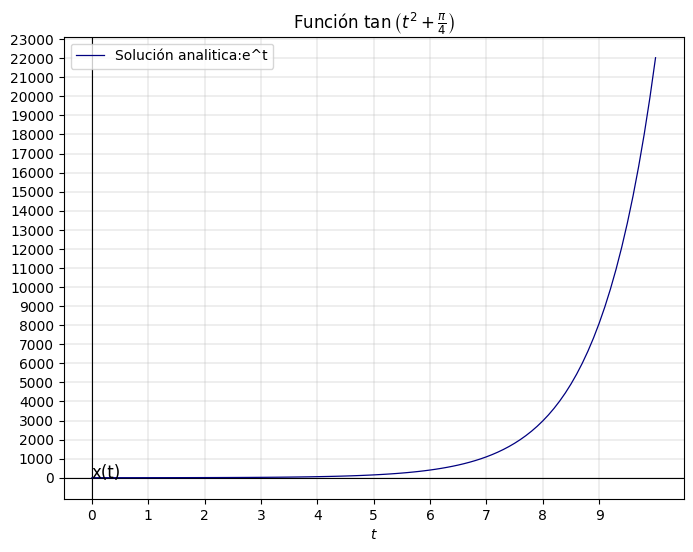

In [104]:
plt.figure(figsize=(8, 6))
plt.text(0,0, 'x(t)', rotation='horizontal', fontsize=12)  # Colocar 'x(t)' verticalmente
plt.xticks(np.arange(0, 10, 1))  # Marcas cada unidad en el eje x
plt.yticks(np.arange(0, 150000, 1000))  # Marcas cada unidad en el eje y
plt.grid(True, linewidth=0.3)  # Ajusta el ancho de las líneas de la cuadrícula
plt.axhline(0, color='black', linewidth=0.8)  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.8)  # Línea vertical en x=0
plt.xlabel('$t$')
indice_max = np.argmax(np.array(vector_T_funcion_real) > 0.8)
plt.plot(
    vector_T_funcion_real,
    vector_f_solucion,
    label="Solución analitica:e^t",
    color='navy',
    linestyle='-',
    linewidth=0.9,
    markersize=12, 
)
plt.legend(loc='upper left')  # Esto coloca la leyenda en la esquina superior izquierda
plt.title(r"Función $\tan\left(t^2 + \frac{\pi}{4}\right)$")
#plt.savefig(r"Función $\tan\left(t^2 + \frac{\pi}{4}\right)$.pdf")  # Con esta se guarda la imagen en formato pdf
#plt.show()

### Definición de las variables simbolicas

In [105]:
t, x = sp.symbols('t x')

### Si requerimos cambiar la funcion, aqui la definimos:

In [106]:
#fun = "(2*t*(1+x**2))"
fun =  "x"
#fun = "sin(t)"

Creamos la funcion programatica $f$  
Como parametro tenemos la funcion que creamos, si no le pasamos este parametro usa nuestra funcion por defecto

In [107]:
func_f = funcion_f(fun)
func_f

x

## Metodo de Euler

$x_{k+1} = x_{k} + f(t_{k},x_{k})\Delta t$

In [108]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_euler_pequeño = np.array([paso_inicial_T])
vector_X_euler_pequeño = np.array([paso_inicial_X]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones*10):
    dic_evaluar = {
        t: vector_T_euler_pequeño[iteracion],
        x: vector_X_euler_pequeño[iteracion]
    }
    t_i = vector_T_euler_pequeño[iteracion] + delta_T/10
    x_i = vector_X_euler_pequeño[iteracion] + func_f.subs(dic_evaluar) * delta_T/10

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_T_euler_pequeño = np.append(vector_T_euler_pequeño, t_i)
    vector_X_euler_pequeño = np.append(vector_X_euler_pequeño, x_i)

In [109]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_euler = np.array([paso_inicial_T])
vector_X_euler = np.array([paso_inicial_X]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones):
    dic_evaluar = {
        t: vector_T_euler[iteracion],
        x: vector_X_euler[iteracion]
    }
    t_i = vector_T_euler[iteracion] + delta_T
    x_i = vector_X_euler[iteracion] + func_f.subs(dic_evaluar) * delta_T

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_T_euler = np.append(vector_T_euler, t_i)
    vector_X_euler = np.append(vector_X_euler, x_i)

### Si requiere ver los vectores resultantes basta expandir y correr las siguientes celdas

In [110]:
len(vector_T_funcion_real)

101

In [135]:
vector_f_solucion[61]

445.857770082514

In [121]:
vector_T_euler_pequeño

array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2,
       4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [113]:
vector_X_euler_pequeño

array([1, 1.10000000000000, 1.21000000000000, 1.33100000000000,
       1.46410000000000, 1.61051000000000, 1.77156100000000,
       1.94871710000000, 2.14358881000000, 2.35794769100000,
       2.59374246010000, 2.85311670611000, 3.13842837672100,
       3.45227121439310, 3.79749833583241, 4.17724816941565,
       4.59497298635722, 5.05447028499294, 5.55991731349223,
       6.11590904484146, 6.72749994932560, 7.40024994425816,
       8.14027493868398, 8.95430243255237, 9.84973267580761,
       10.8347059433884, 11.9181765377272, 13.1099941914999,
       14.4209936106499, 15.8630929717149, 17.4494022688864,
       19.1943424957751, 21.1137767453526, 23.2251544198878,
       25.5476698618766, 28.1024368480643, 30.9126805328707,
       34.0039485861577, 37.4043434447735, 41.1447777892509,
       45.2592555681760, 49.7851811249936, 54.7636992374929,
       60.2400691612422, 66.2640760773664, 72.8904836851031,
       80.1795320536134, 88.1974852589747, 97.0172337848722,
       106.7189571633

In [114]:
vector_T_euler

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [115]:
vector_X_euler

array([1, 2.00000000000000, 4.00000000000000, 8.00000000000000,
       16.0000000000000, 32.0000000000000, 64.0000000000000,
       128.000000000000, 256.000000000000, 512.000000000000,
       1024.00000000000], dtype=object)

### Grafiquemos

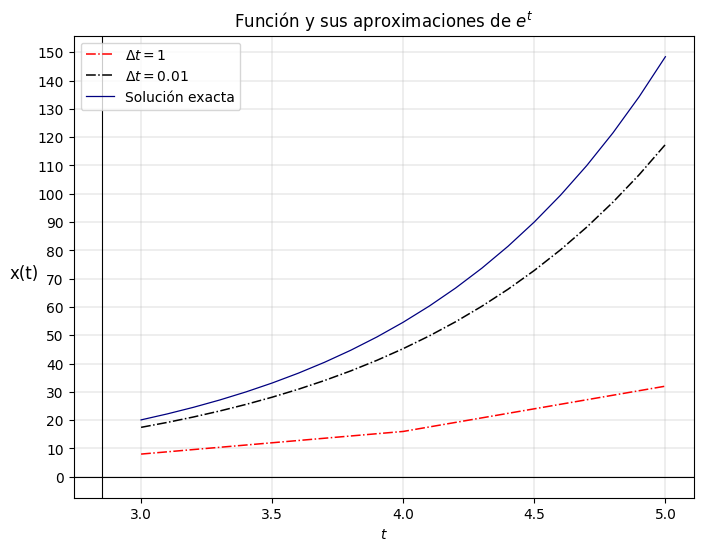

In [134]:
plt.figure(figsize=(8, 6))
plt.text(2.5, 70, 'x(t)', rotation='horizontal', fontsize=12)  # Colocar 'x(t)' verticalmente
plt.xticks(np.arange(2, 6, 0.5))  # Marcas cada unidad en el eje x
plt.yticks(np.arange(0, 200, 10))  # Marcas cada unidad en el eje y
plt.grid(True, linewidth=0.3)  # Ajusta el ancho de las líneas de la cuadrícula
plt.axhline(0, color='black', linewidth=0.8)  # Línea horizontal en y=0
plt.axvline(2.85, color='black', linewidth=0.8)  # Línea vertical en x=0
plt.xlabel('$t$')
plt.plot(
    vector_T_euler[3:6],
    vector_X_euler[3:6],
    label="$\Delta t = 1$",
    color='red',
    linestyle='-.',
    linewidth=1.1,
    markersize=12, 
)
plt.plot(
    vector_T_euler_pequeño[30:51],
    vector_X_euler_pequeño[30:51],
    label="$\Delta t = 0.01$",
    color='black',
    linestyle='-.',
    linewidth=1.1,
    markersize=12, 
)
plt.plot(
    vector_T_funcion_real[30:51],
    vector_f_solucion[30:51],
    label="Solución exacta",
    color='navy',
    linestyle='solid',
    linewidth=0.9,
    markersize=12, 
)
plt.legend(loc='upper left')  # Esto coloca la leyenda en la esquina superior izquierda
plt.title(r"Función y sus aproximaciones de $e^t$")
plt.savefig("Función y sus aproximaciones de $e^t$.pdf")  # Con esta se guarda la imagen en formato pdf
plt.show()

## Metodo de Runge-Kutta (Euler de cuarto orden)

$x_{k+1} = x_{k} + (\frac{m_{k} + 2n_{k} + 2p_{k} + q_{k}}{6})\Delta t $

Definamos $m_{k} , n_{k} , p_{k} , q_{k}$

$n_{k} =  f(t_{k} + \frac{\Delta t}{2}, x_{k}+f(t_{k},x_{k}) \frac{\Delta t}{2})$

$m_{k} = f(t_{k},x_{k})$

$n_{k} = f(t_{k} + \frac{\Delta t}{2}, y_{k} )$  donde  $y_{k} = x_{k} + m_{k} \frac{\Delta t}{2}$

$p_{k} = f(t_{k} + \frac{\Delta t}{2}, z_{k} )$  donde  $z_{k} = x_{k} + n_{k}\frac{\Delta t}{2}$

$q_{k} = f(t_{k+1}, w_{k})$  donde  $w_{k} = x_{k} + p_{k}\Delta t$

In [377]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_rk = np.array([paso_inicial_T])
vector_X_rk = np.array([paso_inicial_X]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones):
    dic_eval_rk_m = {
        t: vector_T_rk[iteracion],
        x: vector_X_rk[iteracion]
    }
    m_i = func_f.subs(dic_eval_rk_m)

    dic_eval_rk_n = {
        t: vector_T_rk[iteracion] + (delta_T/2),
        x: vector_X_rk[iteracion] + m_i * (delta_T/2)
    }
    n_i = func_f.subs(dic_eval_rk_n)
    
    dic_eval_rk_p = {
        t: vector_T_rk[iteracion] + (delta_T/2),
        x: vector_X_rk[iteracion] + n_i * (delta_T/2)
    }
    p_i = func_f.subs(dic_eval_rk_p)

    t_i = vector_T_rk[iteracion] + delta_T
    vector_T_rk = np.append(vector_T_rk, t_i)

    dic_eval_rk_q = {
        t: vector_T_rk[iteracion + 1] + (delta_T/2),
        x: vector_X_rk[iteracion] + p_i * (delta_T)
    }
    q_i = func_f.subs(dic_eval_rk_q)

    x_i = vector_X_rk[iteracion] + (delta_T/6) * (m_i + 2 * n_i + 2 * p_i + q_i)

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_X_rk = np.append(vector_X_rk, x_i)

In [378]:
vector_T_rk

array([0.   , 0.008, 0.016, 0.024, 0.032, 0.04 , 0.048, 0.056, 0.064,
       0.072, 0.08 , 0.088, 0.096, 0.104, 0.112, 0.12 , 0.128, 0.136,
       0.144, 0.152, 0.16 , 0.168, 0.176, 0.184, 0.192, 0.2  , 0.208,
       0.216, 0.224, 0.232, 0.24 , 0.248, 0.256, 0.264, 0.272, 0.28 ,
       0.288, 0.296, 0.304, 0.312, 0.32 , 0.328, 0.336, 0.344, 0.352,
       0.36 , 0.368, 0.376, 0.384, 0.392, 0.4  , 0.408, 0.416, 0.424,
       0.432, 0.44 , 0.448, 0.456, 0.464, 0.472, 0.48 , 0.488, 0.496,
       0.504, 0.512, 0.52 , 0.528, 0.536, 0.544, 0.552, 0.56 , 0.568,
       0.576, 0.584, 0.592, 0.6  , 0.608, 0.616, 0.624, 0.632, 0.64 ,
       0.648, 0.656, 0.664, 0.672, 0.68 , 0.688, 0.696, 0.704, 0.712,
       0.72 , 0.728, 0.736, 0.744, 0.752, 0.76 , 0.768, 0.776, 0.784,
       0.792, 0.8  ])

In [379]:
vector_X_rk

array([1, 1.00014934425714, 1.00055482009596, 1.00121673924468,
       1.00213561121789, 1.00331214462459, 1.00474724899076,
       1.00644203710491, 1.00839782789718, 1.01061614986500,
       1.01309874506121, 1.01584757366276, 1.01886481914143,
       1.02215289406074, 1.02571444652639, 1.02955236732109,
       1.03366979775838, 1.03807013829360, 1.04275705793486,
       1.04773450450110, 1.05300671577957, 1.05857823164028,
       1.06445390717108, 1.07063892690346, 1.07713882020613,
       1.08395947793168, 1.09110717040965, 1.09858856688943,
       1.10641075654655, 1.11458127117761, 1.12310810972220,
       1.13199976476421, 1.14126525118104, 1.15091413712700,
       1.16095657755688, 1.17140335051791, 1.18226589646314,
       1.19355636086709, 1.20528764045555, 1.21747343339696,
       1.23012829384194, 1.24326769124250, 1.25690807493295,
       1.27106694451155, 1.28576292662733, 1.30101585884966,
       1.31684688138294, 1.33327853748405, 1.35033488355052,
       1.368041609972

### Grafiquemos

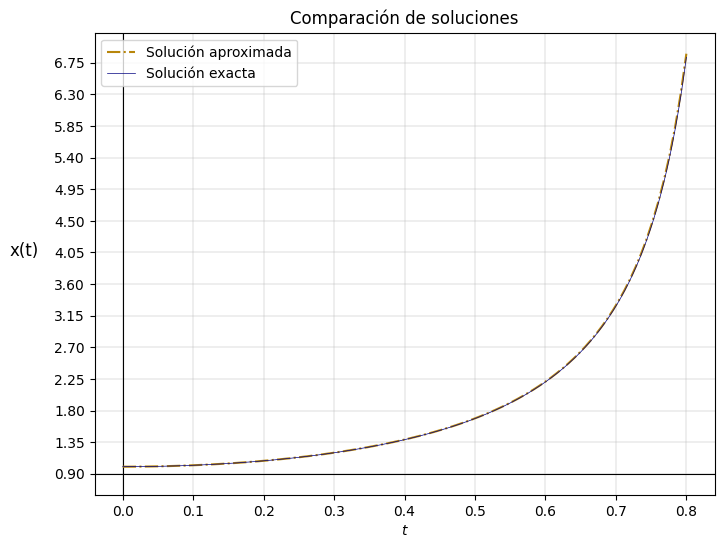

In [393]:
plt.figure(figsize=(8, 6))
plt.text(-0.16, 4, 'x(t)', rotation='horizontal', fontsize=12)  # Colocar 'x(t)' verticalmente
plt.xticks(np.arange(0, 0.9, 0.1))  # Marcas cada unidad en el eje x
plt.yticks(np.arange(0, 7, 0.45))  # Marcas cada unidad en el eje y
plt.grid(True, linewidth=0.3)  # Ajusta el ancho de las líneas de la cuadrícula
plt.axhline(0.9, color='black', linewidth=0.8)  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.8)  # Línea vertical en x=0
plt.xlabel('$t$')
plt.plot(
    vector_T_rk,
    vector_X_rk,
    label="Solución aproximada",
    color='darkgoldenrod',
    linestyle='-.',
    linewidth=1.5,
    markersize=12, 
)
plt.plot(
    vector_T_funcion_real,
    vector_f_solucion,
    label="Solución exacta",
    color='navy',
    linestyle='-',
    linewidth=0.5,
    markersize=12, 
)
plt.legend(loc='upper left')  # Esto coloca la leyenda en la esquina superior izquierda
plt.title("Comparación de soluciones")
#plt.savefig("Función $tan(t^2 + \pi/4)$.pdf")  # Con esta se guarda la imagen en formato pdf
plt.show()

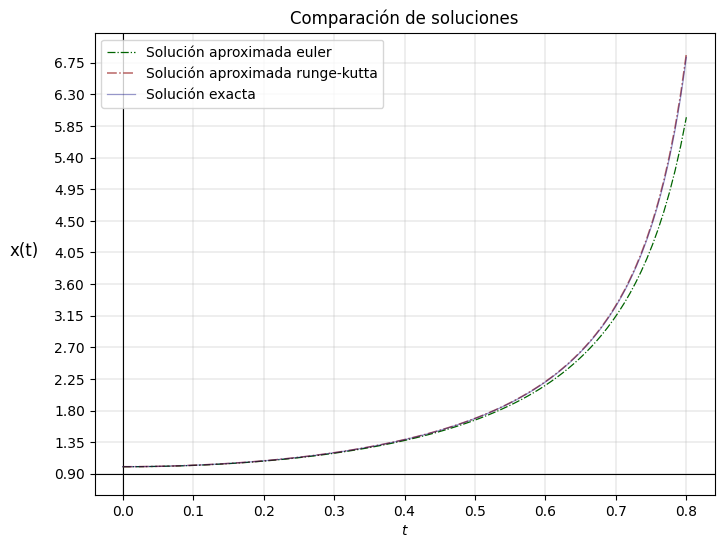

In [420]:
plt.figure(figsize=(8, 6))
plt.text(-0.16, 4, 'x(t)', rotation='horizontal', fontsize=12)  # Colocar 'x(t)' verticalmente
plt.xticks(np.arange(0, 0.9, 0.1))  # Marcas cada unidad en el eje x
plt.yticks(np.arange(0, 7, 0.45))  # Marcas cada unidad en el eje y
plt.grid(True, linewidth=0.3)  # Ajusta el ancho de las líneas de la cuadrícula
plt.axhline(0.9, color='black', linewidth=0.8)  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.8)  # Línea vertical en x=0
plt.xlabel('$t$')
plt.plot(
    vector_T_euler,
    vector_X_euler,
    label="Solución aproximada euler",
    color='darkgreen',
    linestyle='-.',
    linewidth=0.9,
    markersize=12, 
)
plt.plot(
    vector_T_rk,
    vector_X_rk,
    label="Solución aproximada runge-kutta",
    color='darkred',
    linestyle='-.',
    alpha = 0.6,
    linewidth=1.1,
    markersize=12, 
)
plt.plot(
    vector_T_funcion_real,
    vector_f_solucion,
    label="Solución exacta",
    color='navy',
    linestyle='-',
    alpha = 0.4,
    linewidth=0.9,
    markersize=12, 
)
plt.legend(loc='upper left')  # Esto coloca la leyenda en la esquina superior izquierda
plt.title("Comparación de soluciones")
plt.savefig("Comparación de soluciones.pdf")  # Con esta se guarda la imagen en formato pdf
plt.show()

## Metodo de Euler mejorado

$x_{k+1} = x_{k} + (\frac{m_{k} + n_{k}}{2})\Delta t $  
Como podemos notar el metodo de euler mejorado requiere que se definan tanto $m_{k}$ como $n_{k}$ entonces empecemos definiendolas:  
$m_{k} = f(t_{k},x_{k})$  
$n_{k} = f(t_{k+1},y_{k})$  
donde  
$y_{k} = x_{k} + f(t_{k},x_{k}) \Delta t$

In [382]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_em = np.array([paso_inicial_T])
vector_X_em = np.array([paso_inicial_X]) 

for iteracion in range(numero_iteraciones):
    dic_eval_em_m = {
        t: vector_T_em[iteracion],
        x: vector_X_em[iteracion]
    }
    em_mi = func_f.subs(dic_eval_em_m)

    t_i = vector_T_em[iteracion] + delta_T
    vector_T_em = np.append(vector_T_em, t_i)

    dic_eval_em_n = {
        t: vector_T_em[iteracion + 1],
        x: vector_X_em[iteracion] + em_mi * delta_T
    }
    em_ni = func_f.subs(dic_eval_em_n)

    x_i = vector_X_em[iteracion] + (delta_T/2) * (em_mi + em_ni )

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_X_em = np.append(vector_X_em, x_i)

### Grafiquemos

In [ ]:
plt.figure(figsize=(8, 6))
plt.text(-1, 1, 'x(t)', rotation='horizontal', fontsize=12)  # Colocar 'x(t)' verticalmente
plt.xticks(np.arange(0, 7, 1))  # Marcas cada unidad en el eje x
plt.yticks(np.arange(-0.5, 3, 0.5))  # Marcas cada unidad en el eje y
plt.grid(True, linewidth=0.3)  # Ajusta el ancho de las líneas de la cuadrícula
plt.axhline(0, color='black', linewidth=0.8)  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.8)  # Línea vertical en x=0
plt.xlabel('$t$')
plt.plot(
    vector_T_em,
    vector_X_em,
    label="Solución aproximada",
    color='green',
    linestyle='-.',
    linewidth=0.9,
    markersize=12, 
)
plt.plot(
    vector_T_funcion_real,
    vector_f_solucion,
    label="Solución exacta",
    color='navy',
    linestyle='-',
    linewidth=0.9,
    markersize=12, 
)
plt.legend(loc='upper left')  # Esto coloca la leyenda en la esquina superior izquierda
plt.title("Comparación de soluciones")
#plt.savefig("Función $tan(t^2 + \pi/4)$.pdf")  # Con esta se guarda la imagen en formato pdf
plt.show()